<h1 style='text-align: center'><strong>Decision Tree</strong></h1>
<h3 style='text-align: center'>Machine learning</h3>
<h5 style='text-align: center'><a href='https://github.com/AlvaroVasquezAI'>Álvaro Vásquez AI</a></h5>

<div style='text-align: center'>
    <a href='https://github.com/AlvaroVasquezAI'><img src='https://img.icons8.com/color/48/000000/github--v1.png'/></a>
    <a href='https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/'><img src='https://img.icons8.com/color/48/000000/linkedin.png'/></a>
    <a href='https://www.instagram.com/alvarovasquez.ai'><img src='https://img.icons8.com/color/48/000000/instagram-new--v1.png'/></a>
    <a href='https://twitter.com/alvarovasquezai'><img src='https://img.icons8.com/color/48/000000/twitter--v1.png'/></a>
    <a href='https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA'><img src='https://img.icons8.com/color/48/000000/youtube-play.png'/></a>
    <a href='mailto: agarciav2102@alumno.ipn.mx'><img src='https://img.icons8.com/color/48/000000/email.png'/></a>
</div>

<h2 style='text-align: center'><strong>Prediction desease progression</strong></h2>

<h4 style='text-align: center'>Diabetes dataset</h4>

<div>
    <h3><strong>Table of contents</strong></h3>
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Libraries">Libraries</a></li>
        <li><a href="#Dataset">Dataset</a></li>
        <li><a href="#Features">Features</a></li>
        <li><a href="#Splitting-the-dataset">Splitting the dataset</a></li>
        <li><a href="#Decision-tree-model">Decision tree model</a></li>
        <li><a href="#Predictions">Predictions</a></li>
        <li><a href="#Evaluation">Evaluation</a></li>
    </ol>
</div>

<h2 style='text-align: center' id='Introduction'><strong>1. Introduction</strong></h2>

A decision tree is a powerful and versatile machine learning algorithm used for both classification and regression tasks. It is a flowchart-like tree structure where each internal node represents a test on an attribute (feature), each branch represents the outcome of that test, and each leaf node represents a class label (for classification) or a continuous value (for regression).

The topmost node in a decision tree is known as the root node, and it represents the best predictor of the target variable. Decision trees are built using algorithms such as ID3, C4.5, CART, and others, which use metrics like Gini impurity, information gain, and mean squared error to determine the best splits.

The goal of a decision tree is to create a model that predicts the value or class of a target variable by learning simple decision rules inferred from the data features. The tree is constructed by recursively splitting the dataset into subsets based on the attribute that results in the largest information gain or the greatest reduction in variance for regression trees.

### Types of Decision Trees
- **Classification Trees**: Used when the target variable is categorical. The outcome is a class label such as 'Yes' or 'No'.
- **Regression Trees**: Used when the target variable is continuous. The outcome is a continuous value.

### Advantages of Decision Trees
- **Easy to Understand and Interpret**: The tree structure is intuitive and can be visualized.
- **Requires Little Data Preparation**: No need for normalization or scaling of data.
- **Handles Both Numerical and Categorical Data**: Capable of handling different types of data within the same model.

### Disadvantages of Decision Trees
- **Prone to Overfitting**: Especially if the tree is very deep, leading to complex models that do not generalize well.
- **Unstable**: Small variations in the data might result in a completely different tree being generated.
- **Bias**: Can be biased towards features with more levels.

### Building a Decision Tree
1. **Select the Best Attribute**: Use a metric like Gini impurity, information gain, or variance reduction to find the best attribute for splitting the data.
2. **Split the Dataset**: Partition the dataset into subsets based on the selected attribute.
3. **Repeat**: Recursively apply the same process to each subset until one of the stopping criteria is met (e.g., maximum depth, minimum samples per leaf, or no further information gain).
4. **Prune the Tree**: Optionally, prune the tree to remove branches that have little importance and to prevent overfitting.

Decision Trees provide a clear indication of which features are most important for prediction and can handle both categorical and continuous variables, making them a robust choice for many machine learning tasks.


<h2 style='text-align: center' id='Libraries'><strong>2. Libraries</strong></h2>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Import necessary libraries
- **pandas**: For data manipulation and analysis.
- **train_test_split from sklearn.model_selection**: To split the dataset into training and testing sets.
- **DecisionTreeRegressor, plot_tree from sklearn.tree**: To create and train the decision tree regression model and to plot the tree structure.
- **load_diabetes from sklearn.datasets**: To load the Diabetes dataset.
- **matplotlib.pyplot**: For plotting the results.
- **mean_absolute_error, mean_squared_error, r2_score from sklearn.metrics**: To evaluate the model's performance.


<h2 style='text-align: center' id='Dataset'><strong>3. Dataset</strong></h2>

In [2]:
# Load the Diabetes dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### Load the Diabetes dataset
- **diabetes = load_diabetes()**: Loads the Diabetes dataset.
- **df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)**: Creates a DataFrame `df` containing the features of the dataset.
- **df['target'] = diabetes.target**: Adds the target variable (`target`) to the DataFrame.


<h2 style='text-align: center' id='Features'><strong>4. Features</strong></h2>

In [3]:
# Select the features and target variable
X = df[['bmi']]  # Using Body Mass Index (BMI) as the feature
y = df['target']

### Select the features and target variable
- **X = df[['bmi']]**: Selects the 'bmi' (Body Mass Index) as the feature for the model.
- **y = df['target']**: Selects the 'target' as the target variable (disease progression).

<h2 style='text-align: center' id='Splitting-the-dataset'><strong>5. Splitting the dataset</strong></h2>

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Split the data into training and testing sets
- **train_test_split(X, y, test_size=0.2, random_state=42)**: Splits the data into training and testing sets. 80% of the data is used for training (`X_train` and `y_train`), and 20% is used for testing (`X_test` and `y_test`).
- **test_size=0.2**: Specifies that 20% of the data should be used for testing.
- **random_state=42**: Ensures reproducibility by setting a random seed.


<h2 style='text-align: center' id='Decision-tree-model'><strong>6. Decision tree model</strong></h2>

In [5]:
# Create and train the Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

### Create and train the Decision Tree Regressor model
- **model = DecisionTreeRegressor()**: Initializes the decision tree regression model.
- **model.fit(X_train, y_train)**: Trains the model using the training data (`X_train` and `y_train`).


<h2 style='text-align: center' id='Predictions'><strong>7. Predictions</strong></h2>

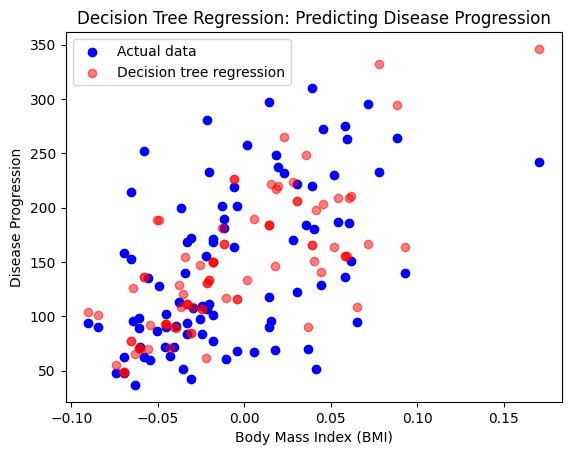

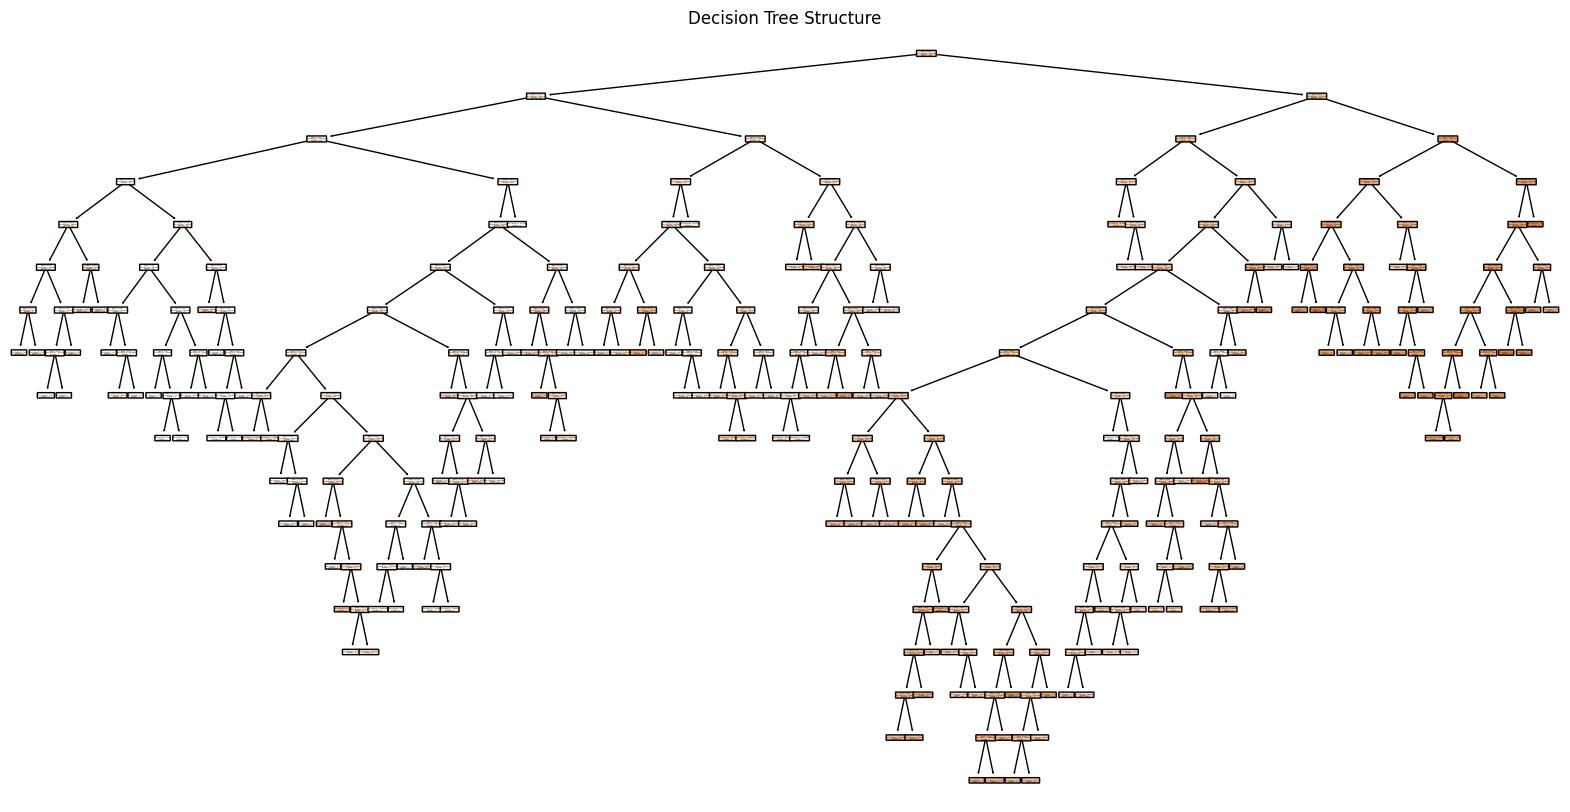

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.scatter(X_test, y_pred, color='red', label='Decision tree regression', alpha=0.5)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression')
plt.legend()
plt.title('Decision Tree Regression: Predicting Disease Progression')
plt.show()

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=['bmi'], filled=True, rounded=True)
plt.title('Decision Tree Structure')
plt.show()

### Make predictions
- **y_pred = model.predict(X_test)**: Uses the trained model to make predictions on the testing data (`X_test`).

### Plot the results
- **plt.scatter(X_test, y_test, color='blue', label='Actual data')**: Creates a scatter plot of the actual data (testing data) with 'bmi' on the x-axis and 'target' on the y-axis. Points are colored blue.
- **plt.scatter(X_test, y_pred, color='red', label='Decision tree regression', alpha=0.5)**: Plots the decision tree regression results using the predicted values (`y_pred`) on the testing data (`X_test`). The points are colored red and have some transparency (`alpha=0.5`).
- **plt.xlabel('Body Mass Index (BMI)')**: Sets the x-axis label.
- **plt.ylabel('Disease Progression')**: Sets the y-axis label.
- **plt.legend()**: Adds a legend to the plot.
- **plt.title('Decision Tree Regression: Predicting Disease Progression')**: Sets the title of the plot.
- **plt.show()**: Displays the plot.

### Plot the decision tree
- **plt.figure(figsize=(20, 10))**: Creates a figure with a specified size.
- **plot_tree(model, feature_names=['bmi'], filled=True, rounded=True)**: Plots the decision tree structure with the feature name 'bmi', filled colors, and rounded nodes.
- **plt.title('Decision Tree Structure')**: Sets the title of the plot.
- **plt.show()**: Displays the plot.



<h2 style='text-align: center' id='Evaluation'><strong>8. Evaluation</strong></h2>

In [7]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 52.39063670411985
Mean Squared Error (MSE): 4471.594026217228
R-squared (R²): 0.15600869162171438


: 

### Evaluate the model
- **mae = mean_absolute_error(y_test, y_pred)**: Calculates the Mean Absolute Error (MAE) of the predictions.
- **mse = mean_squared_error(y_test, y_pred)**: Calculates the Mean Squared Error (MSE) of the predictions.
- **r2 = r2_score(y_test, y_pred)**: Calculates the R-squared (R²) score of the predictions.
- **print(f"Mean Absolute Error (MAE): {mae}")**: Prints the MAE.
- **print(f"Mean Squared Error (MSE): {mse}")**: Prints the MSE.
- **print(f"R-squared (R²): {r2}")**: Prints the R² score.
